In [3]:
import os
import pandas as pd
from tqdm.auto import tqdm

from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [4]:
from luwiji.word_vector import illustration

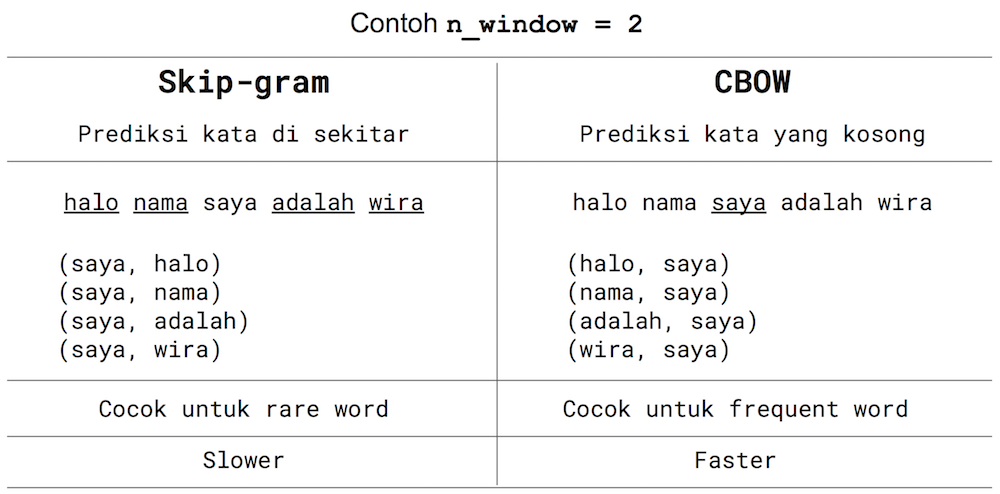

In [5]:
illustration.cbow_vs_skipgram

# Prepare Corpus

In [6]:
df = pd.read_csv('data/data/gojek_review.csv')
df.head()

,review,rate
0,Sangat kecewa. Kecewa sekali. Udh top up. Mau ...,1
1,Ga niat ngasih promo sialan temen udh pake ref...,1
2,Kalau sistemnya rata begini apa bedanya yg raj...,1
3,"Ongkosnya da mahal, minimal 16rb..... Sekarang...",1
4,Tolol anjing..!!!! Aplikasi yang katanga karya...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  1277 non-null   object
 1   rate    1277 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


In [8]:
sentences = [word_tokenize(review.lower()) for review in tqdm(df.review)]
sentences[:5]

  0%|          | 0/1277 [00:00<?, ?it/s]

[['sangat',
  'kecewa',
  '.',
  'kecewa',
  'sekali',
  '.',
  'udh',
  'top',
  'up',
  '.',
  'mau',
  'di',
  'transaksi',
  'in',
  'malah',
  'kasih',
  'nomor',
  'yang',
  'salah',
  '.',
  'padahal',
  'nomor',
  'di',
  'profil',
  'benar',
  '.',
  'buat',
  'ap',
  'ah',
  'q',
  'top',
  'up',
  'tp',
  'ga',
  'bisa',
  'digunain',
  '.',
  'balikin.',
  '!',
  'ga',
  'becus',
  '.',
  'kasih',
  'nomer',
  'saalah',
  '.',
  'saya',
  'mau',
  'masukin',
  'kode',
  'transaksi',
  'gimana.',
  '!',
  '!',
  '!',
  '!'],
 ['ga',
  'niat',
  'ngasih',
  'promo',
  'sialan',
  'temen',
  'udh',
  'pake',
  'reff',
  'ga',
  'pake',
  'cara',
  'curang',
  'malah',
  'di',
  'stop',
  '.',
  'kapitalis',
  '.',
  'daerah',
  'ku',
  'ongkir',
  'ga',
  'ada',
  'subsidi',
  'di',
  'daerah',
  'lain',
  'masih',
  'ada',
  '.',
  'ampas',
  'gojek',
  'skrng',
  '.',
  'strategi',
  'baru',
  'ga',
  'bakar',
  'duit',
  'gimana',
  '.',
  'yg',
  'ada',
  'transaksi',
  'h

# Train Word2Vec Model

In [9]:
# window liat kekiri dan kekanan, sg = skipgram, hs= hirarki sampling
model = Word2Vec(sentences, vector_size=128, window=5, min_count=3, workers=4, epochs=1000, sg=0, hs=0)

# Save

In [10]:
os.makedirs('model/w2v/', exist_ok=True)

In [11]:
model.save('model/w2v/gojek_review.w2v')

# Load

In [12]:
model = Word2Vec.load('model/w2v/gojek_review.w2v')

# Continue Training

In [13]:
"aplikasinya gak nyaman banget dipakai".lower().split()

['aplikasinya', 'gak', 'nyaman', 'banget', 'dipakai']

In [14]:
contoh_data = [
    ['aplikasinya', 'bagus', 'kok', '.', 'sangat', 'bermanfaat', 'untuk', 'saya'],
    ['aplikasinya', 'gak', 'nyaman', 'banget', 'dipakai']
]

In [15]:
model.train(contoh_data, total_examples=len(contoh_data), epochs=1)

(9, 13)

In [16]:
model.save('model/w2v/gojek_review.w2v')

# Model information

In [17]:
w2v = model.wv

In [18]:
w2v.index_to_key

[',',
 '.',
 'saya',
 '!',
 'di',
 'gojek',
 '..',
 'yg',
 'bisa',
 '?',
 'ada',
 'nya',
 'driver',
 'dan',
 'ini',
 'aplikasi',
 'tidak',
 'yang',
 'gak',
 'mau',
 'lagi',
 'ga',
 '...',
 'tolong',
 'aja',
 'sudah',
 'tapi',
 'untuk',
 'voucher',
 'padahal',
 'gopay',
 'ke',
 'sama',
 'udah',
 'order',
 'lebih',
 'akun',
 'sangat',
 'dengan',
 'ya',
 'buat',
 'sekarang',
 'kenapa',
 'jadi',
 'kasih',
 'malah',
 'lama',
 'dari',
 'gofood',
 'itu',
 'promo',
 'kalo',
 'jauh',
 'juga',
 'dapat',
 'pake',
 'karena',
 'masuk',
 'banyak',
 'terus',
 'kalau',
 'apa',
 'baru',
 'go',
 'dong',
 'kok',
 'gk',
 'kecewa',
 'pakai',
 'selalu',
 'harus',
 'pesan',
 'orderan',
 'sistem',
 'hari',
 'cuma',
 'makin',
 'tp',
 "''",
 'saldo',
 'banget',
 'dulu',
 'atau',
 'anak',
 'beli',
 'sekali',
 'mohon',
 'sampai',
 'makanan',
 'sering',
 'mahal',
 'setiap',
 'grab',
 'masih',
 'klo',
 'pas',
 'jangan',
 'baik',
 'saja',
 '1',
 'drivernya',
 'sy',
 'update',
 'kali',
 'membantu',
 'perbaiki',
 '(',

In [19]:
w2v.vectors

array([[-0.8657764 , -0.06534974,  1.3022673 , ..., -0.28262144,
        -0.8545959 ,  0.54103494],
       [-0.06447044,  0.5769012 ,  1.8832101 , ..., -1.598386  ,
        -0.44759002, -0.5982655 ],
       [ 0.12771648,  0.5201248 , -0.06565875, ..., -0.00966836,
        -0.5265836 ,  0.0326946 ],
       ...,
       [-2.1541553 ,  2.0038564 , -1.8689781 , ..., -1.6952575 ,
        -2.2967439 ,  1.1129863 ],
       [ 1.1205343 ,  1.5135105 , -1.3003978 , ...,  0.5160459 ,
        -0.87490237,  0.07632166],
       [ 1.0128647 , -0.11541384, -4.077339  , ..., -1.1135939 ,
        -0.45554554, -1.4469981 ]], dtype=float32)

In [20]:
w2v.vector_size

128

In [21]:
w2v['ojol']

array([-1.3711373 , -2.6029308 , -0.8029015 ,  0.7546699 ,  1.367412  ,
       -0.99582183,  0.84567153, -2.344946  , -0.81746495,  5.931568  ,
       -4.9738317 , -5.971207  ,  2.8066788 ,  1.6381726 ,  1.9546885 ,
       -0.72986144,  1.3370571 , -1.5177592 ,  0.2835593 ,  3.8356135 ,
        2.0790262 , -2.2070932 ,  0.11511397,  3.6271698 ,  2.9489598 ,
       -0.26955432, -0.8607602 ,  3.667926  , -3.6808667 , -0.8936187 ,
       -3.8586116 ,  0.13169064,  0.2074652 ,  3.5810142 ,  1.3727293 ,
       -4.678071  ,  1.3621658 ,  0.3221298 ,  0.57310694,  0.65742236,
       -2.7370217 ,  1.968686  , -0.32601264,  8.183017  ,  1.5763347 ,
        0.66175556,  0.87236536, -2.8024304 ,  2.1174767 ,  1.5075011 ,
       -3.4789894 ,  3.0390697 ,  0.9985276 , -1.013145  ,  0.53868276,
       -4.6917243 , -1.9227648 , -1.1777444 , -3.4270043 ,  2.6607184 ,
       -0.71945566,  3.631568  , -3.5214777 , -0.43646657, -4.597866  ,
       -3.1488967 ,  3.3671262 ,  3.903984  ,  3.158564  ,  1.90

# Sanity Check

## similar word

In [22]:
w2v.similar_by_key('anjing', topn=5)

[('gaji', 0.3397051990032196),
 ('dasar', 0.3359471559524536),
 ('goblok', 0.33439749479293823),
 ('kau', 0.3024914860725403),
 ('peringatan', 0.28939053416252136)]

## higher order visualization

In [23]:
from umap import UMAP
import numpy as np
import pandas as pd
import plotly.express as px

In [24]:
x = UMAP().fit_transform(w2v.vectors)

In [26]:
df = pd.DataFrame(x, columns=['umap1', 'umap2'])
df['text'] = w2v.index_to_key

In [29]:
df

,umap1,umap2,text
0,4.309094,-1.679846,","
1,4.374815,-3.287158,.
2,4.091351,-3.410171,saya
3,4.123203,-1.494317,!
4,3.692873,-2.061652,di
...,...,...,...
1694,3.827583,0.270430,pusing
1695,2.451985,-0.411729,bepergian
1696,4.877501,-1.387492,misalnya
1697,2.263550,-0.282258,indah


In [28]:
fig = px.scatter(df, x='umap1', y='umap2', text='text')
fig.update_traces(textposition='top center')
fig.update_layout(
    height=800,
    title_text='Reduced Word2vec Visualization'
)
fig.show()